## Proximal Policy Optimization (PPO)

This file contains scripts for running our implemented PPO algorithm (with clipped objective, see `ppo.py` for details). Two environments, namely `CartPole-v1` and `MountainCarContinuous-v0` were tested.

### Sanity check on our implementation

In [1]:
from ppo import PPO
from ppo import NormalizedEnv
from utils import plot_training_results

In [2]:
# import other libs
import torch
import gym
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import json

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### CartPole-v1

In [4]:
# hyperparameters
env_name = 'CartPole-v1'

ac_kwargs = dict(hidden_sizes=[64], activation=torch.nn.ReLU)
steps_per_epoch = 1000
epochs = 200
seed = 0
gamma = 0.99
clip_ratio = 0.3
pi_lr = 2e-4
vf_lr = 2e-4
train_pi_iters = 50
train_v_iters = 50
lam=0.97
max_ep_len = 1000
observation_normalization = False
use_sde = False
entropy_coef = 0.0
eval_interval = 1000
reward_normalization = False

if observation_normalization:
    # create environment
    env_fn = lambda: NormalizedEnv(gym.make(env_name))
    try:
        action_dim = env_fn().env.action_space.shape[0]
    except:
        action_dim = env_fn().env.action_space.n
    state_dim = env_fn().env.observation_space.shape[0]
else:
    env_fn = lambda: gym.make(env_name)
    try:
        action_dim = env_fn().action_space.shape[0]
    except:
        action_dim = env_fn().action_space.n
    state_dim = env_fn().observation_space.shape[0]

#### Clip ratio

In [ ]:
# clip ratios
clip_ratios = [0.1, 0.25, 0.5]
eval_reward = {c: [] for c in clip_ratios}
for s in range(3):
    for c in clip_ratios:
        model = PPO(
            state_dim=state_dim,
            action_dim=action_dim,
            hidden_dim = ac_kwargs['hidden_sizes'][0],
            activation = ac_kwargs['activation'].__name__,
            deterministic_actions=False,
            pi_lr=pi_lr,
            vf_lr=vf_lr,
            train_pi_iters=train_pi_iters,
            train_v_iters=train_v_iters,
            gamma=gamma,
            lam=lam,
            eps_clip=c,
            steps_per_epoch=steps_per_epoch,
            n_epochs=epochs,
            max_ep_len=max_ep_len,
            seed=s,
            use_sde=use_sde,
            entropy_coef=entropy_coef,
            normalize_rewards=reward_normalization,
        )
        eval_reward[c].append(model.train(env_fn(), reward_shaping=None, eval_interval=eval_interval))

# save eval_reward as json

with open('./results/cartpole_clip_ratio.json', 'w') as f:
    json.dump(eval_reward, f)

In [ ]:
# load eval_reward from json
with open('./results/cartpole_clip_ratio.json', 'r') as f:
    eval_reward = json.load(f)

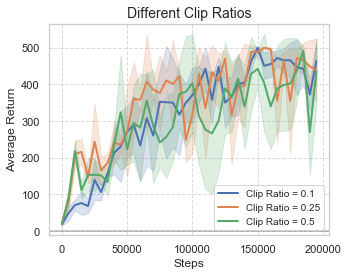


Summary Statistics:
--------------------------------------------------
Clip Ratio = 0.1:
  Final Mean Average Return: 462.07 ± 40.50
  Best Final Average Return: 491.80
  Worst Final Average Return: 404.80
  Median Final Average Return: 489.60
--------------------------------------------------
Clip Ratio = 0.25:
  Final Mean Average Return: 493.93 ± 4.42
  Best Final Average Return: 500.00
  Worst Final Average Return: 489.60
  Median Final Average Return: 492.20
--------------------------------------------------
Clip Ratio = 0.5:
  Final Mean Average Return: 208.07 ± 88.68
  Best Final Average Return: 317.60
  Worst Final Average Return: 100.40
  Median Final Average Return: 206.20
--------------------------------------------------


In [ ]:
# convert to strings
for i in range(len(clip_ratios)):
    clip_ratios[i] = str(clip_ratios[i])
plot_training_results(eval_reward, 'Clip Ratio', clip_ratios, eval_interval, env_name, save_path='./figures/cartpole_clip_ratio.pdf', subsample=5)

#### Value function learning rate

In [ ]:
# clip ratios
v_learning_rate = [1e-3, 5e-4, 1e-4]
eval_reward = {v: [] for v in v_learning_rate}
for s in range(3):
    for v in v_learning_rate:
        model = PPO(
            state_dim=state_dim,
            action_dim=action_dim,
            hidden_dim = ac_kwargs['hidden_sizes'][0],
            activation = ac_kwargs['activation'].__name__,
            deterministic_actions=False,
            pi_lr=pi_lr,
            vf_lr=v,
            train_pi_iters=train_pi_iters,
            train_v_iters=train_v_iters,
            gamma=gamma,
            lam=lam,
            eps_clip=clip_ratio,
            steps_per_epoch=steps_per_epoch,
            n_epochs=epochs,
            max_ep_len=max_ep_len,
            seed=s,
            use_sde=use_sde,
            entropy_coef=entropy_coef,
            normalize_rewards=reward_normalization,
        )
        eval_reward[v].append(model.train(env_fn(), reward_shaping=None, eval_interval=eval_interval))

# save eval_reward as json

with open('./results/cartpole_v_learning_rate.json', 'w') as f:
    json.dump(eval_reward, f)

In [6]:
# load eval_reward from json
with open('./results/cartpole_v_learning_rate.json', 'r') as f:
    eval_reward = json.load(f)

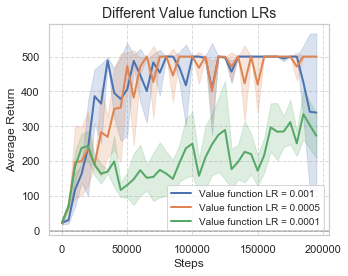


Summary Statistics:
--------------------------------------------------
Value function LR = 0.001:
  Final Mean Average Return: 352.07 ± 209.21
  Best Final Average Return: 500.00
  Worst Final Average Return: 56.20
  Median Final Average Return: 500.00
--------------------------------------------------
Value function LR = 0.0005:
  Final Mean Average Return: 500.00 ± 0.00
  Best Final Average Return: 500.00
  Worst Final Average Return: 500.00
  Median Final Average Return: 500.00
--------------------------------------------------
Value function LR = 0.0001:
  Final Mean Average Return: 389.73 ± 81.78
  Best Final Average Return: 500.00
  Worst Final Average Return: 304.40
  Median Final Average Return: 364.80
--------------------------------------------------


In [7]:
# convert to strings
for i in range(len(v_learning_rate)):
    v_learning_rate[i] = str(v_learning_rate[i])
plot_training_results(eval_reward, 'Value function LR', v_learning_rate, eval_interval, env_name, save_path='./figures/cartpole_v_learning_rate.pdf', subsample=5)

#### Policy learning rate

In [ ]:
# clip ratios
p_learning_rate = [1e-3, 5e-4, 1e-4]
eval_reward = {p: [] for p in p_learning_rate}
for s in range(3):
    for p in p_learning_rate:
        model = PPO(
            state_dim=state_dim,
            action_dim=action_dim,
            hidden_dim = ac_kwargs['hidden_sizes'][0],
            activation = ac_kwargs['activation'].__name__,
            deterministic_actions=False,
            pi_lr=p,
            vf_lr=vf_lr,
            train_pi_iters=train_pi_iters,
            train_v_iters=train_v_iters,
            gamma=gamma,
            lam=lam,
            eps_clip=clip_ratio,
            steps_per_epoch=steps_per_epoch,
            n_epochs=epochs,
            max_ep_len=max_ep_len,
            seed=s,
            use_sde=use_sde,
            entropy_coef=entropy_coef,
            normalize_rewards=reward_normalization,
        )
        eval_reward[p].append(model.train(env_fn(), reward_shaping=None, eval_interval=eval_interval))

# save eval_reward as json
with open('./results/cartpole_p_learning_rate.json', 'w') as f:
    json.dump(eval_reward, f)

In [9]:
# load eval_reward from json
with open('./results/cartpole_p_learning_rate.json', 'r') as f:
    eval_reward = json.load(f)

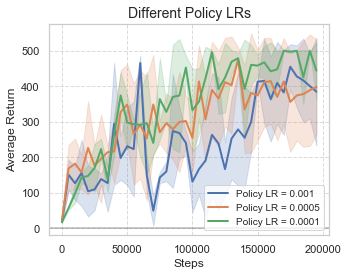


Summary Statistics:
--------------------------------------------------
Policy LR = 0.001:
  Final Mean Average Return: 469.53 ± 43.09
  Best Final Average Return: 500.00
  Worst Final Average Return: 408.60
  Median Final Average Return: 500.00
--------------------------------------------------
Policy LR = 0.0005:
  Final Mean Average Return: 411.73 ± 73.44
  Best Final Average Return: 500.00
  Worst Final Average Return: 320.20
  Median Final Average Return: 415.00
--------------------------------------------------
Policy LR = 0.0001:
  Final Mean Average Return: 469.00 ± 43.84
  Best Final Average Return: 500.00
  Worst Final Average Return: 407.00
  Median Final Average Return: 500.00
--------------------------------------------------


In [10]:
# convert to strings
for i in range(len(p_learning_rate)):
    p_learning_rate[i] = str(p_learning_rate[i])
plot_training_results(eval_reward, 'Policy LR', p_learning_rate, eval_interval, env_name, save_path='./figures/cartpole_p_learning_rate.pdf', subsample=5)

### MountainCarContinuous

In [10]:
# Tried: action clipping, observation normalization didn't help, also deterministic policy
# Use a tanh
# add entropy regularization
# orthogonal initialization
# gradient clipping
# state normalization
# sde
# reward normalization
# Problem: it will learn to stay at the bottom to avoid negative reward

# hyperparameters
env_name = 'MountainCarContinuous-v0'

ac_kwargs = dict(hidden_sizes=[64], activation=torch.nn.ReLU)
steps_per_epoch = 1000
epochs = 200
seed = 1
gamma = 0.99
clip_ratio = 0.2
pi_lr = 3e-4
vf_lr = 3e-4
train_pi_iters = 50
train_v_iters = 50
lam=0.97
max_ep_len = 1000
observation_normalization = True
use_sde = False
entropy_coef = 0.005
reward_normalization = False

if observation_normalization:
    # create environment
    env_fn = lambda: NormalizedEnv(gym.make(env_name))
    try:
        action_dim = env_fn().env.action_space.shape[0]
    except:
        action_dim = env_fn().env.action_space.n
    state_dim = env_fn().env.observation_space.shape[0]
else:
    env_fn = lambda: gym.make(env_name)
    try:
        action_dim = env_fn().action_space.shape[0]
    except:
        action_dim = env_fn().action_space.n
    state_dim = env_fn().observation_space.shape[0]

#### Entropy

In [ ]:
# clip ratios
entropy_coef = [0.002, 0.01, 0.05]
eval_reward = {e: [] for e in entropy_coef}
for s in range(3):
    for e in entropy_coef:
        model = PPO(
            state_dim=state_dim,
            action_dim=action_dim,
            hidden_dim = ac_kwargs['hidden_sizes'][0],
            activation = ac_kwargs['activation'].__name__,
            deterministic_actions=False,
            pi_lr=pi_lr,
            vf_lr=vf_lr,
            train_pi_iters=train_pi_iters,
            train_v_iters=train_v_iters,
            gamma=gamma,
            lam=lam,
            eps_clip=clip_ratio,
            steps_per_epoch=steps_per_epoch,
            n_epochs=epochs,
            max_ep_len=max_ep_len,
            seed=s,
            use_sde=use_sde,
            entropy_coef=e,
            normalize_rewards=reward_normalization,
        )
        eval_reward[e].append(model.train(env_fn(), reward_shaping=None, eval_interval=eval_interval))

# save eval_reward as json
with open('./results/mountaincar_entropy_coef.json', 'w') as f:
    json.dump(eval_reward, f)

In [12]:
# load eval_reward from json
with open('./results/mountaincar_entropy_coef.json', 'r') as f:
    eval_reward = json.load(f)

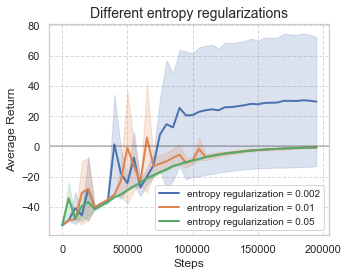


Summary Statistics:
--------------------------------------------------
entropy regularization = 0.002:
  Final Mean Average Return: 30.32 ± 43.65
  Best Final Average Return: 92.05
  Worst Final Average Return: -0.61
  Median Final Average Return: -0.47
--------------------------------------------------
entropy regularization = 0.01:
  Final Mean Average Return: -0.65 ± 0.26
  Best Final Average Return: -0.45
  Worst Final Average Return: -1.02
  Median Final Average Return: -0.49
--------------------------------------------------
entropy regularization = 0.05:
  Final Mean Average Return: -0.66 ± 0.04
  Best Final Average Return: -0.62
  Worst Final Average Return: -0.71
  Median Final Average Return: -0.64
--------------------------------------------------


In [14]:
# convert to strings
for i in range(len(entropy_coef)):
    entropy_coef[i] = str(entropy_coef[i])
plot_training_results(eval_reward, 'entropy regularization', entropy_coef, eval_interval, env_name, save_path='./figures/mountaicar_entropy.pdf', subsample=5)

#### SDE

In [ ]:
# clip ratios
use_sdes = ['true', 'false']
eval_reward = {u: [] for u in use_sdes}
for s in range(3):
    for u in use_sdes:
        model = PPO(
            state_dim=state_dim,
            action_dim=action_dim,
            hidden_dim = ac_kwargs['hidden_sizes'][0],
            activation = ac_kwargs['activation'].__name__,
            deterministic_actions=False,
            pi_lr=pi_lr,
            vf_lr=vf_lr,
            train_pi_iters=train_pi_iters,
            train_v_iters=train_v_iters,
            gamma=gamma,
            lam=lam,
            eps_clip=clip_ratio,
            steps_per_epoch=steps_per_epoch,
            n_epochs=epochs,
            max_ep_len=max_ep_len,
            seed=s,
            use_sde=True if u == 'true' else False,
            entropy_coef=entropy_coef,
            normalize_rewards=reward_normalization,
        )
        eval_reward[u].append(model.train(env_fn(), reward_shaping=None, eval_interval=eval_interval))

# save eval_reward as json
with open('./results/mountaincar_sde.json', 'w') as f:
    json.dump(eval_reward, f)

In [5]:
# load eval_reward from json
with open('./results/mountaincar_sde.json', 'r') as f:
    eval_reward = json.load(f)

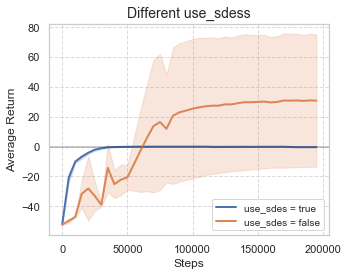


Summary Statistics:
--------------------------------------------------
use_sdes = true:
  Final Mean Average Return: -0.32 ± 0.16
  Best Final Average Return: -0.09
  Worst Final Average Return: -0.44
  Median Final Average Return: -0.43
--------------------------------------------------
use_sdes = false:
  Final Mean Average Return: 30.76 ± 44.17
  Best Final Average Return: 93.22
  Worst Final Average Return: -0.48
  Median Final Average Return: -0.47
--------------------------------------------------


In [ ]:
# convert to strings
plot_training_results(eval_reward, 'use_sdes', use_sdes, eval_interval, env_name, save_path='./figures/mountaicar_sde.pdf', subsample=5)